# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import warnings

# Disable all warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Wholesale_Data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
# check for nulls
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


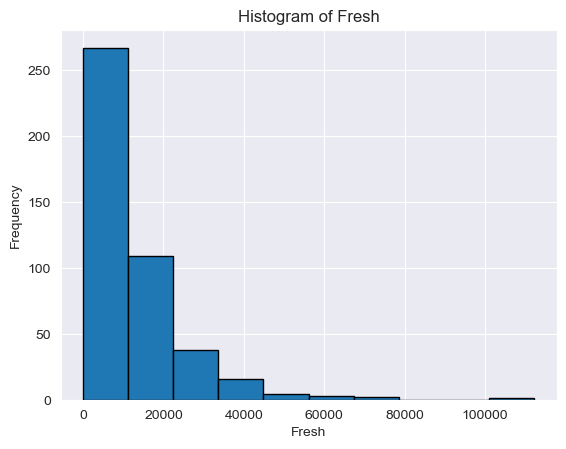

In [5]:
#Histogram
plt.hist(df['Fresh'], bins=10, edgecolor='black')
plt.xlabel('Fresh')
plt.ylabel('Frequency')
plt.title('Histogram of Fresh')
plt.show()

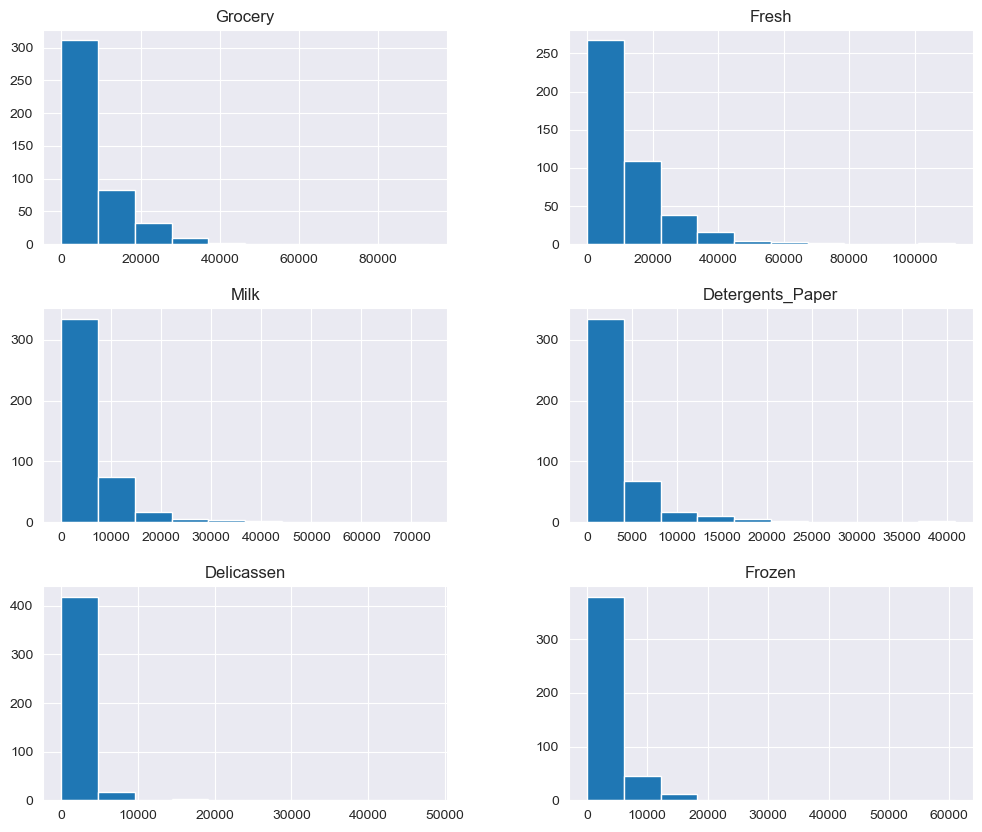

In [6]:
# Histograms for each specified column
df.hist(column=['Grocery', 'Fresh', 'Milk', 'Detergents_Paper','Delicassen',  'Frozen'], figsize=(12, 10))
plt.show()

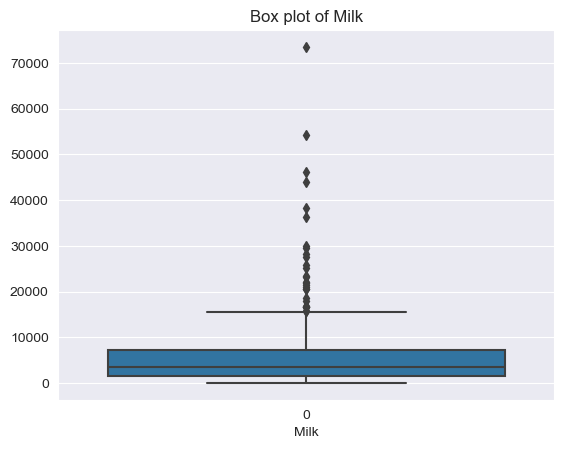

In [7]:
# Box plot of Milk column given the distribution of the data

sns.boxplot(df['Milk'])
plt.xlabel('Milk')
plt.title('Box plot of Milk')
plt.show()

Data is not normally distributed with a number of outliers, lets try to scale the data using the natural logarithm to see if that helps with the data distribution

In [8]:
df_log = np.log(df[['Milk', 'Delicassen', 'Frozen', 'Fresh', 'Grocery','Detergents_Paper']])
#merge the above datafram with the first two columns from df
df_log_data = pd.concat([df_log, df[['Channel', 'Region']]], axis=1)
df_log_data

,Milk,Delicassen,Frozen,Fresh,Grocery,Detergents_Paper,Channel,Region
0,9.175335,7.198931,5.365976,9.446913,8.930759,7.891331,2,3
1,9.191158,7.482119,7.474205,8.861775,9.166179,8.099554,2,3
2,9.083416,8.967504,7.785305,8.756682,8.946896,8.165079,2,3
3,7.086738,7.488853,8.764678,9.492884,8.347827,6.228511,1,3
4,8.596004,8.553525,8.272571,10.026369,8.881558,7.482682,2,3
...,...,...,...,...,...,...,...,...
435,9.396903,7.698029,9.483036,10.299003,9.682030,5.204007,1,3
436,7.266129,7.760467,8.414052,10.577146,6.638568,4.532599,1,3
437,9.647821,7.532088,6.079933,9.584040,10.317020,9.605149,2,3
438,7.591357,7.661527,6.945051,9.238928,7.710653,5.123964,1,3


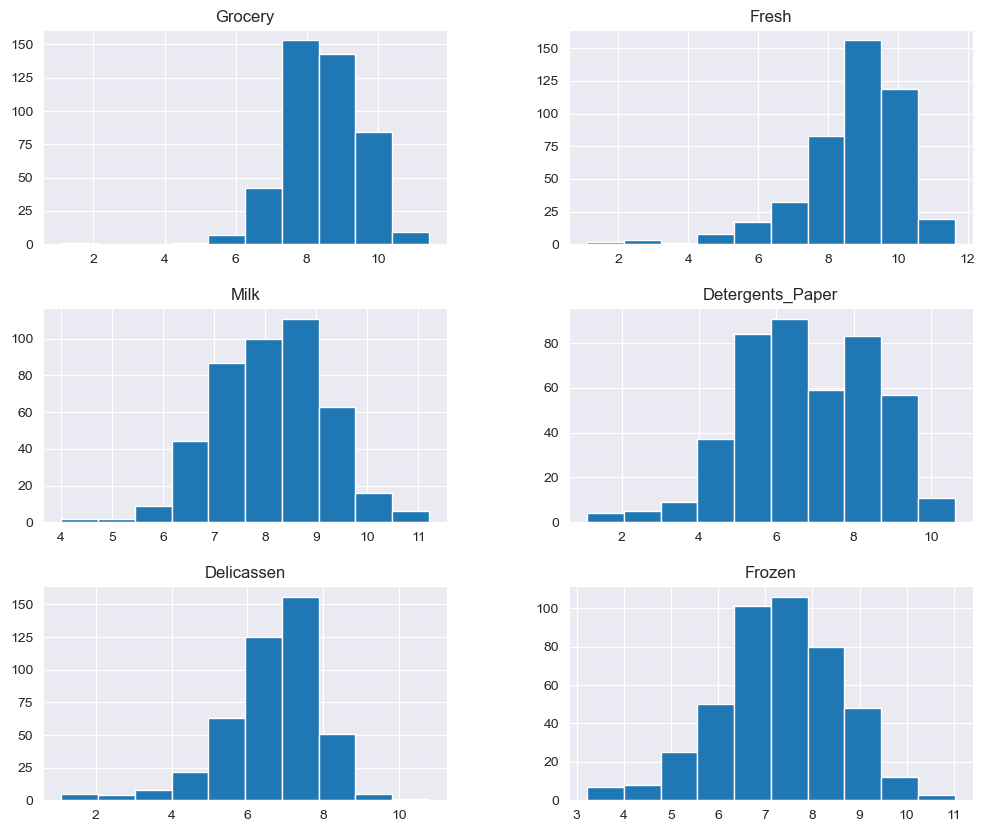

In [9]:
# Regenerate Histogram plot of new dataframe
# Histograms for each specified column
df_log_data.hist(column=['Grocery', 'Fresh', 'Milk', 'Detergents_Paper','Delicassen',  'Frozen'], figsize=(12, 10))
plt.show()

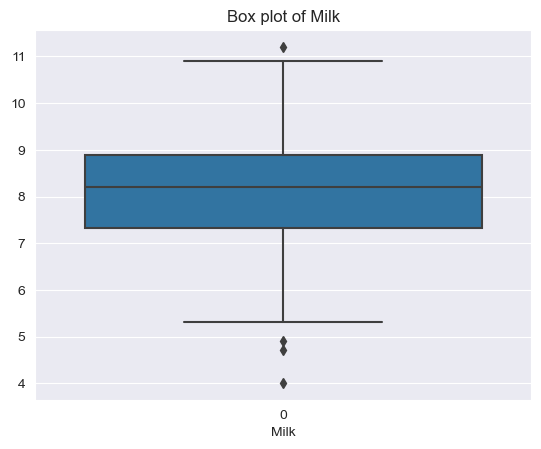

In [10]:
# Box plot

sns.boxplot(df_log_data['Milk'])
plt.xlabel('Milk')
plt.title('Box plot of Milk')
plt.show()

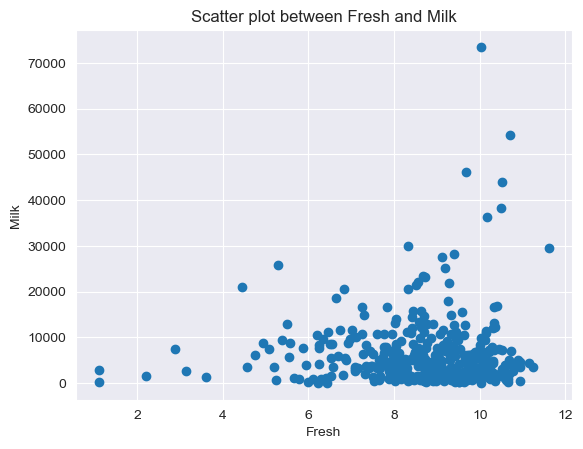

In [11]:
# Scatter Plot
plt.scatter(df_log_data['Fresh'], df['Milk'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Scatter plot between Fresh and Milk')
plt.show()

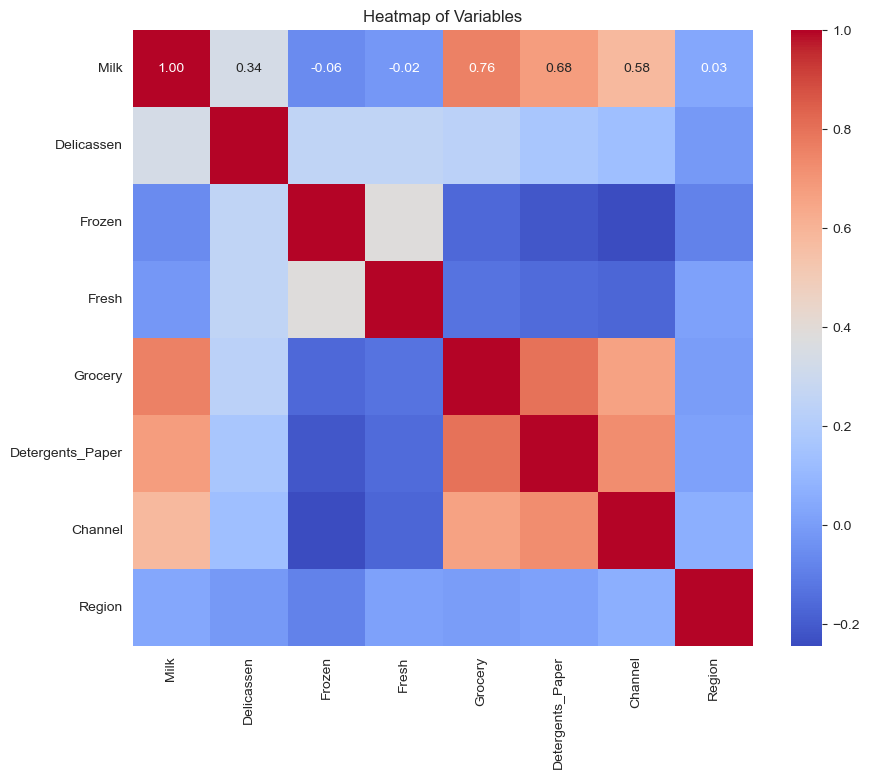

In [12]:
# Heatmap of new dataframe with a colorful pallete
plt.figure(figsize=(10, 8))
sns.heatmap(df_log_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Variables')
plt.show()


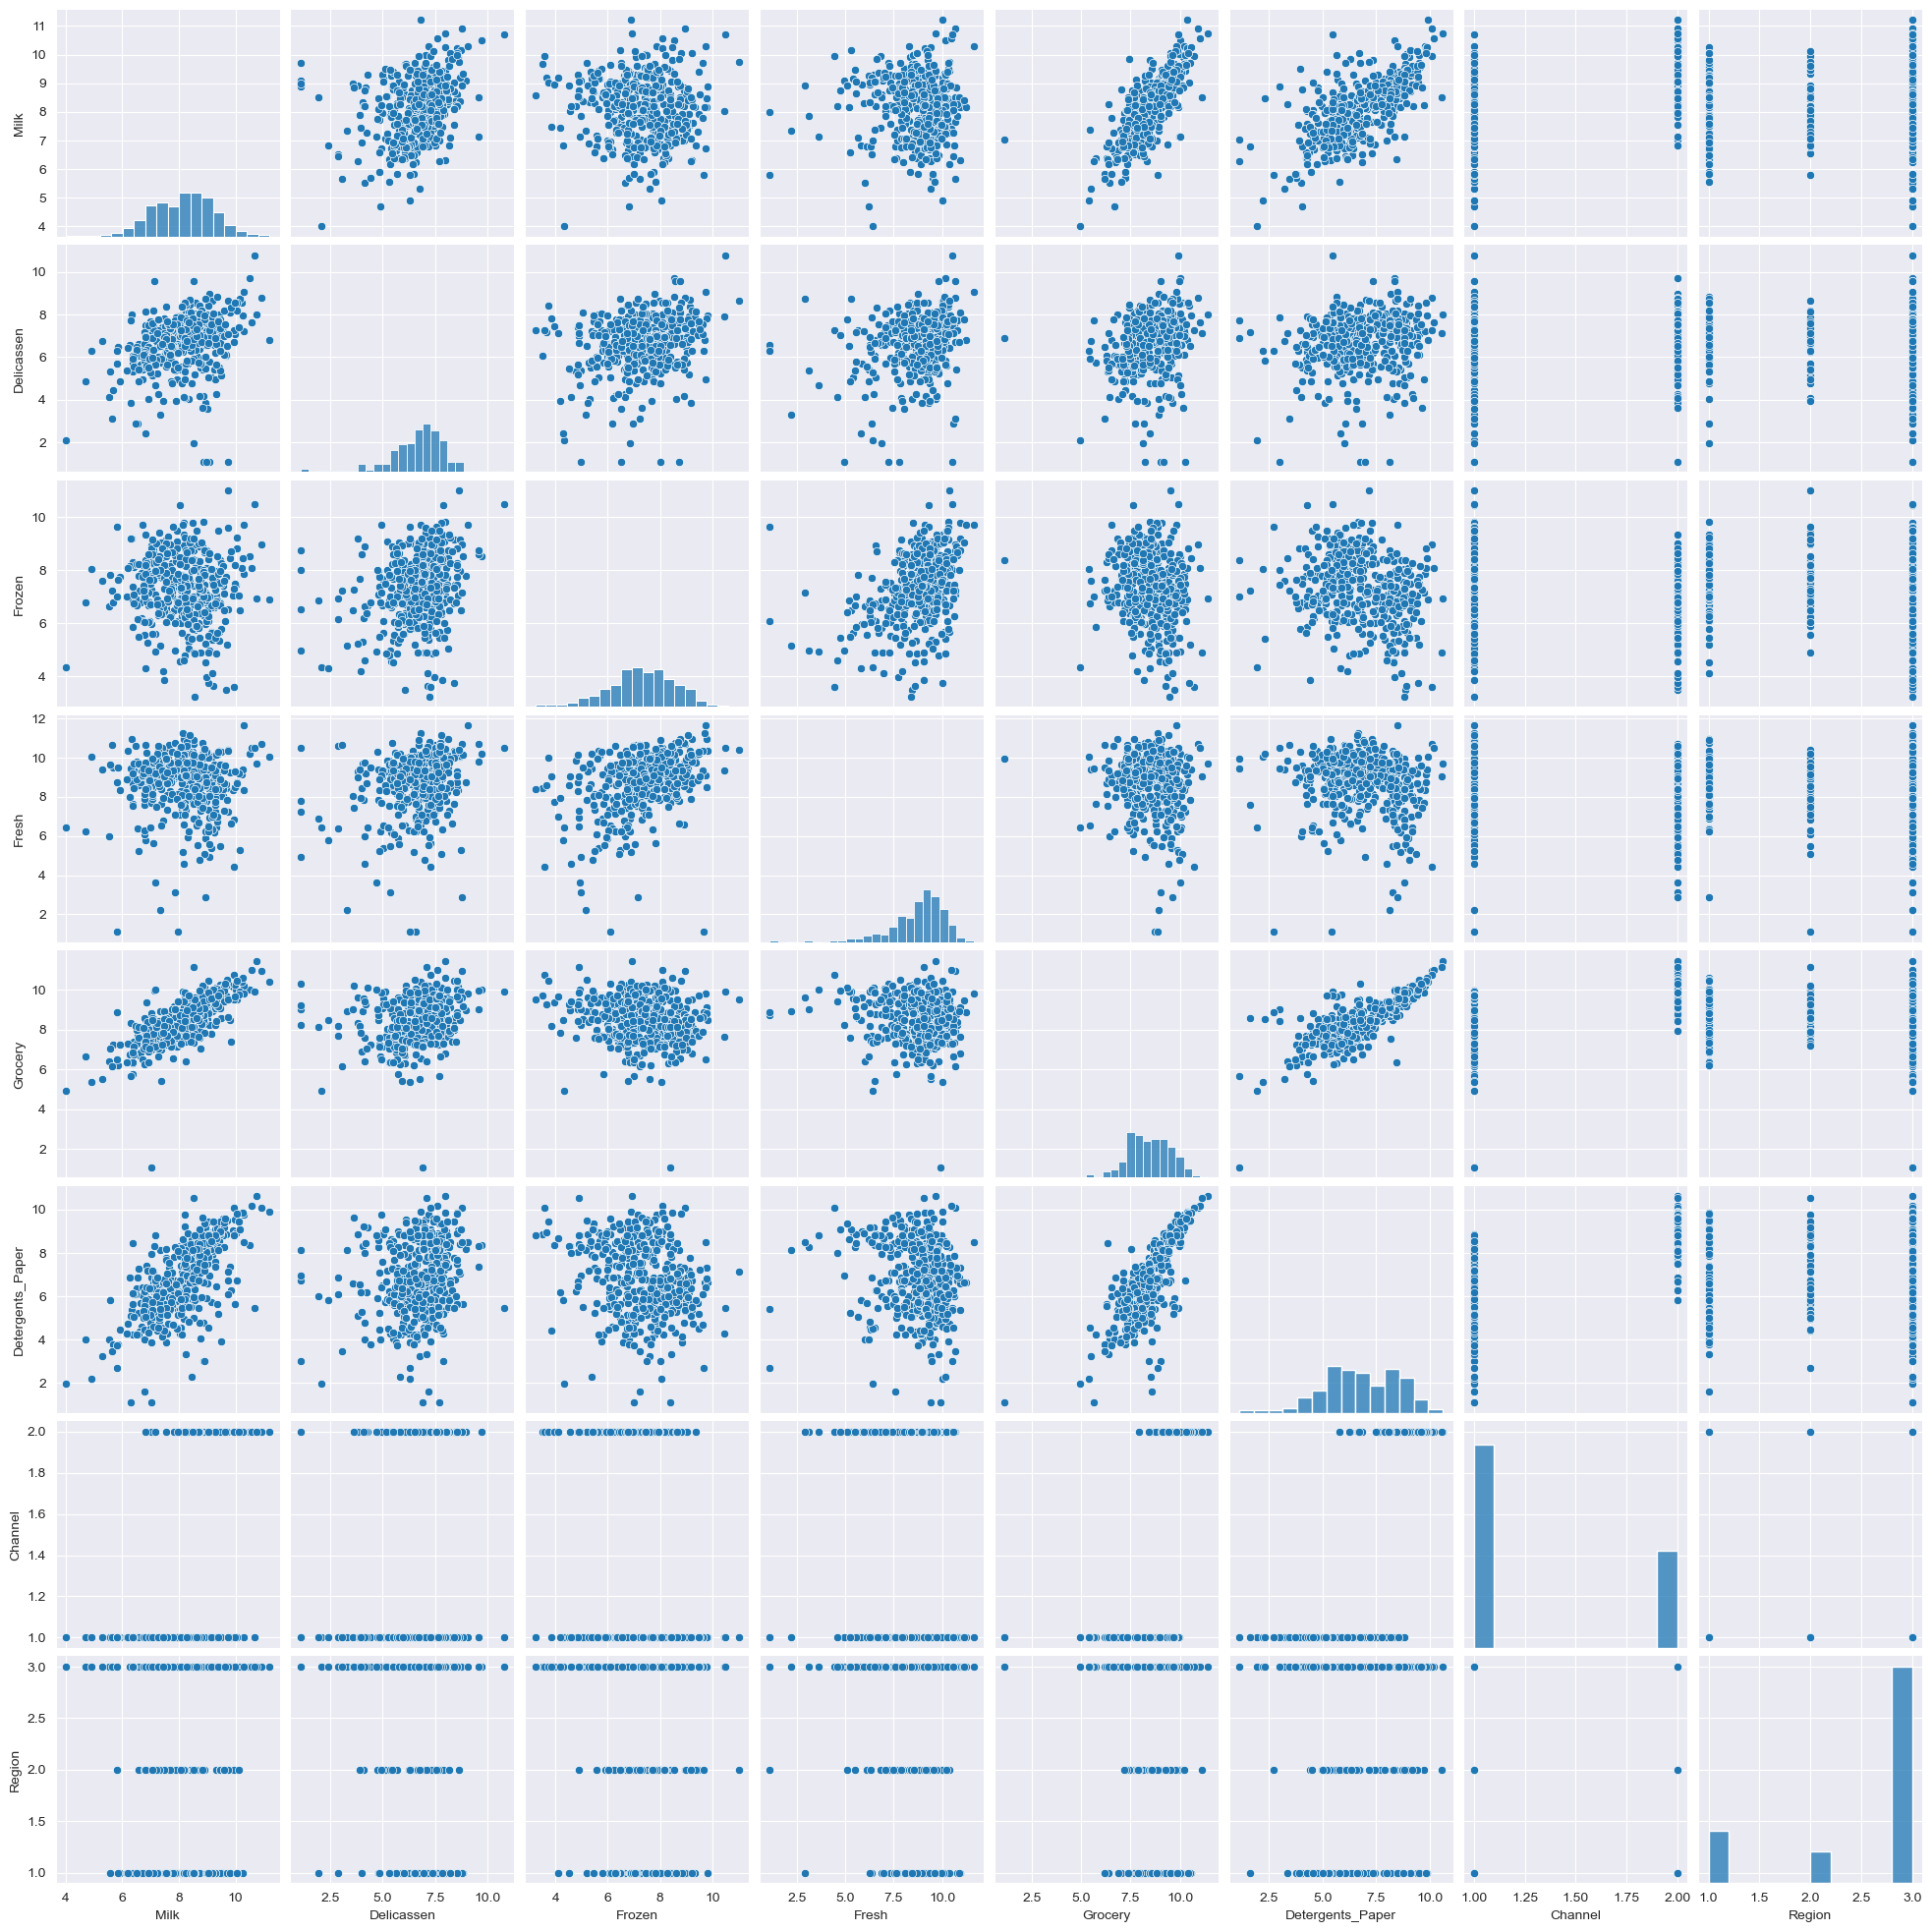

In [13]:
#create a pairplot for all the columns in the df_log_data dataframe
sns.pairplot(df_log_data)
plt.show()

#### Observations
There is strong Linear relationship between `Milk` and `Grocery` and `Grocery` and `Detergents_Paper`. `Grocery` and `Detergents_Paper` is the strong of the two and will be used as the two features to focus on for the respective clustering algorithms coming up in the rest of the notebook.

---

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [14]:
# create a second dataframe from the df_log_data dataframe just to ensure that when I rerun this, there are no issues
df_log_kmeans = df_log_data.copy()
df_log_kmeans

,Milk,Delicassen,Frozen,Fresh,Grocery,Detergents_Paper,Channel,Region
0,9.175335,7.198931,5.365976,9.446913,8.930759,7.891331,2,3
1,9.191158,7.482119,7.474205,8.861775,9.166179,8.099554,2,3
2,9.083416,8.967504,7.785305,8.756682,8.946896,8.165079,2,3
3,7.086738,7.488853,8.764678,9.492884,8.347827,6.228511,1,3
4,8.596004,8.553525,8.272571,10.026369,8.881558,7.482682,2,3
...,...,...,...,...,...,...,...,...
435,9.396903,7.698029,9.483036,10.299003,9.682030,5.204007,1,3
436,7.266129,7.760467,8.414052,10.577146,6.638568,4.532599,1,3
437,9.647821,7.532088,6.079933,9.584040,10.317020,9.605149,2,3
438,7.591357,7.661527,6.945051,9.238928,7.710653,5.123964,1,3


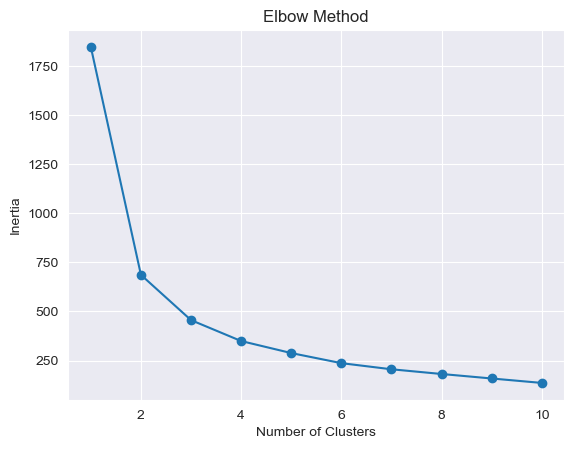

In [15]:


# create a list to store the inertia values
inertia = []

# iterate over a range of possible number of clusters
for k in range(1, 11):
    # create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the data to the KMeans object
    kmeans.fit(df_log_data[['Detergents_Paper', 'Grocery']])
    # append the inertia value to the list
    inertia.append(kmeans.inertia_)

# plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Value for k = 3 based on elbow plot

In [16]:
# Fit the K-Means model with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_log_kmeans[['Detergents_Paper', 'Grocery']])


In [17]:
# Add the cluster labels to the DataFrame
df_log_kmeans['Cluster'] = clusters


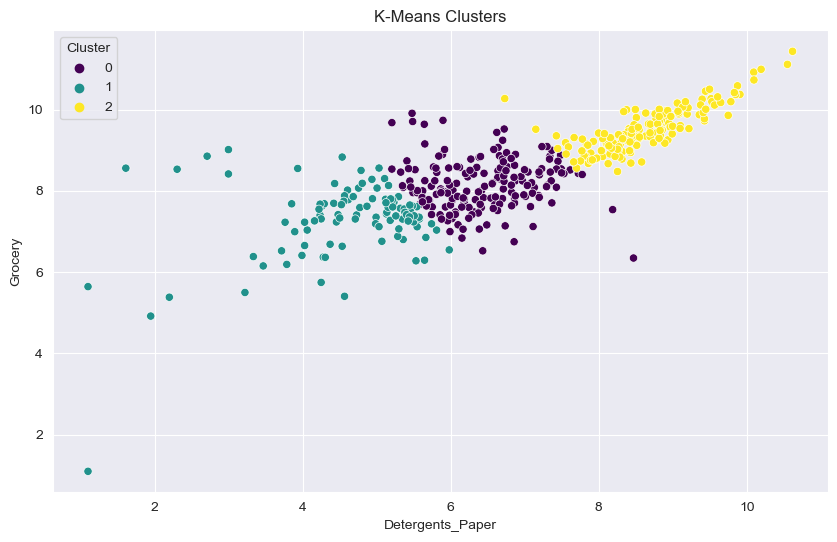

In [18]:
#Visualize the cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_log_kmeans, x='Detergents_Paper', y='Grocery', hue='Cluster', palette='viridis')
plt.title('K-Means Clusters')
plt.show()


In [19]:
# Check Centers of Clusters

centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=['Detergents_Paper', 'Grocery'])
print(centers_df)


   Detergents_Paper   Grocery
0          6.422750  8.152499
1          4.582633  7.290249
2          8.619919  9.509898


In [20]:
# Group the data by cluster and calculate summary statistics
cluster_summary = df_log_kmeans.groupby('Cluster').mean()
print(cluster_summary)


             Milk  Delicassen    Frozen     Fresh   Grocery  Detergents_Paper  \
Cluster                                                                         
0        7.898821    6.674667  7.668915  9.086959  8.152499          6.422750   
1        7.170580    6.334190  7.431215  8.810635  7.290249          4.582633   
2        8.985539    6.868844  6.805862  8.279656  9.509898          8.619919   

          Channel    Region  
Cluster                      
0        1.061798  2.483146  
1        1.000000  2.563107  
2        1.823899  2.597484  


#### Observations
1. **Cluster 0**:
   - This cluster has high average values for Grocery and Detergents_Paper, indicating that customers in this cluster tend to spend a lot on these products.
   - Other products also show relatively high spending, especially Fresh and Frozen items.
   - Customers in this cluster are mostly from Channel 0 and Region 0.

2. **Cluster 1**:
   - This cluster has lower average values for Detergents_Paper and Grocery compared to the other clusters.
   - The average spending on Fresh, Milk, and Frozen items is also lower.
   - A majority of customers in this cluster are from Channel 1 and Region 1.

3. **Cluster 2**:
   - This cluster has the highest average values for both Detergents_Paper and Grocery, indicating that customers in this cluster are the highest spenders on these items.
   - Spending on Milk is also high in this cluster.
   - Customers are distributed across Channel 0 and Region 0, but they are not as distinctly categorized by Channel and Region as Cluster 0 and Cluster 1.
#### Marketing Decisions
  - Target Cluster 2 customers with promotions for Detergents_Paper and Grocery products as they are the highest spenders in these categories.
  - Cluster 0 customers can be targeted with bundled offers on Fresh, Grocery, and Detergents_Paper items.

- **Product Placement**:
  - For Cluster 1 customers, focus on improving the variety and availability of mid-range products, as their spending is lower compared to the other clusters.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [21]:
df_log_hc = df_log_data.copy()
df_log_hc

,Milk,Delicassen,Frozen,Fresh,Grocery,Detergents_Paper,Channel,Region
0,9.175335,7.198931,5.365976,9.446913,8.930759,7.891331,2,3
1,9.191158,7.482119,7.474205,8.861775,9.166179,8.099554,2,3
2,9.083416,8.967504,7.785305,8.756682,8.946896,8.165079,2,3
3,7.086738,7.488853,8.764678,9.492884,8.347827,6.228511,1,3
4,8.596004,8.553525,8.272571,10.026369,8.881558,7.482682,2,3
...,...,...,...,...,...,...,...,...
435,9.396903,7.698029,9.483036,10.299003,9.682030,5.204007,1,3
436,7.266129,7.760467,8.414052,10.577146,6.638568,4.532599,1,3
437,9.647821,7.532088,6.079933,9.584040,10.317020,9.605149,2,3
438,7.591357,7.661527,6.945051,9.238928,7.710653,5.123964,1,3


In [22]:
# Preprocess the data
scaler = StandardScaler()
df_log_hc_scaled = scaler.fit_transform(df_log_hc)

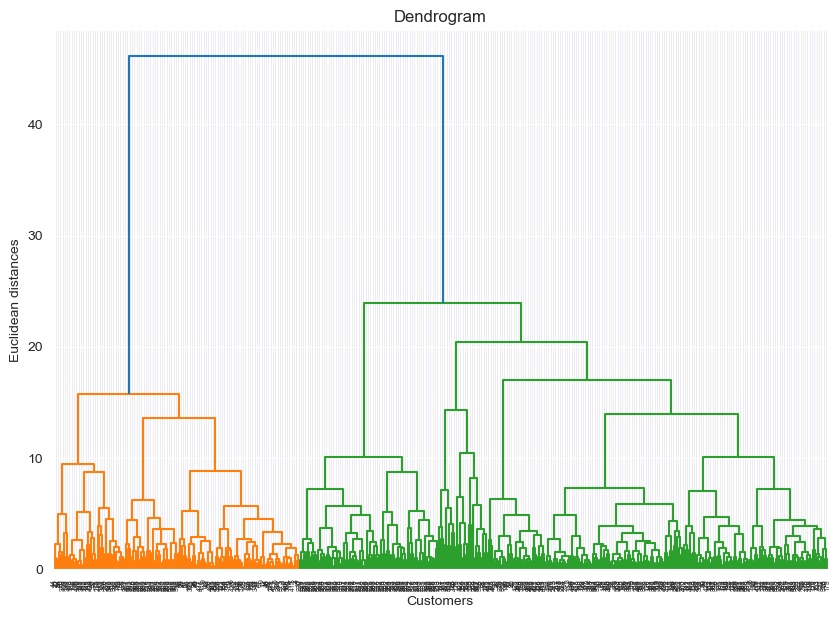

In [23]:
# Create the dendogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_log_hc_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


Based on the above dendrogram the ideal number of clusters is 3. The largest vertical gap appears between the clusters at the second level from the top. Cutting the dendrogram at this level intersects 3 main clusters.

In [24]:
# Fitting hierarchical clustering to the dataset based on the number of clusters being 3
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_log_hc_scaled)


In [25]:
# Add Cluster labels to dataframe
df_log_hc['Cluster'] = y_hc


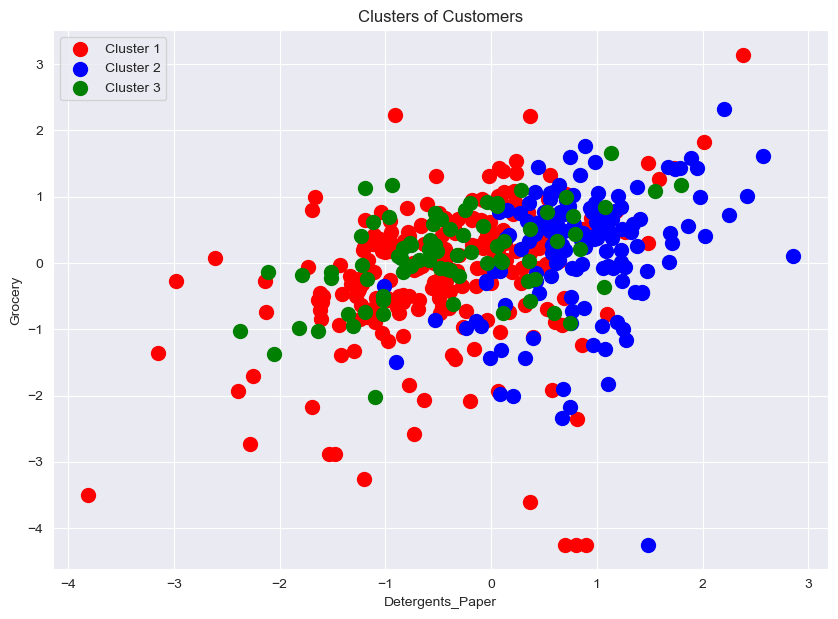

In [26]:
#Visualize the cluster using the highly correlated features Grocery and Detergents Paper

plt.figure(figsize=(10, 7))
plt.scatter(df_log_hc_scaled[y_hc == 0, 0], df_log_hc_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_log_hc_scaled[y_hc == 1, 0], df_log_hc_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_log_hc_scaled[y_hc == 2, 0], df_log_hc_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Customers')
plt.xlabel('Detergents_Paper')
plt.ylabel('Grocery')
plt.legend()
plt.show()


In [27]:
# Group the data by cluster and calculate summary statistics
cluster_summary_hc = df_log_hc.groupby('Cluster').mean()
print(cluster_summary_hc)


             Milk  Delicassen    Frozen     Fresh   Grocery  Detergents_Paper  \
Cluster                                                                         
0        7.684109    6.468714  7.480219  8.844191  7.896615          5.886954   
1        9.047374    6.898495  6.773912  8.357543  9.532361          8.637752   
2        7.701775    6.801057  7.735925  9.073635  8.030782          6.019311   

          Channel    Region  
Cluster                      
0        1.000000  2.941176  
1        1.992857  2.642857  
2        1.037975  1.253165  


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [28]:
df_log_pca = df_log_data.copy()
df_log_pca

,Milk,Delicassen,Frozen,Fresh,Grocery,Detergents_Paper,Channel,Region
0,9.175335,7.198931,5.365976,9.446913,8.930759,7.891331,2,3
1,9.191158,7.482119,7.474205,8.861775,9.166179,8.099554,2,3
2,9.083416,8.967504,7.785305,8.756682,8.946896,8.165079,2,3
3,7.086738,7.488853,8.764678,9.492884,8.347827,6.228511,1,3
4,8.596004,8.553525,8.272571,10.026369,8.881558,7.482682,2,3
...,...,...,...,...,...,...,...,...
435,9.396903,7.698029,9.483036,10.299003,9.682030,5.204007,1,3
436,7.266129,7.760467,8.414052,10.577146,6.638568,4.532599,1,3
437,9.647821,7.532088,6.079933,9.584040,10.317020,9.605149,2,3
438,7.591357,7.661527,6.945051,9.238928,7.710653,5.123964,1,3


In [29]:
#preprocess data
# Assuming df_log_pca is your dataframe
scaler = StandardScaler()
df_log_pca_scaled = scaler.fit_transform(df_log_pca)



In [30]:
# Apply PCA
pca = PCA(n_components=2)  # Here, we are reducing the data to 2 dimensions
principal_components = pca.fit_transform(df_log_pca_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Detergents_Paper', 'Grocery'])


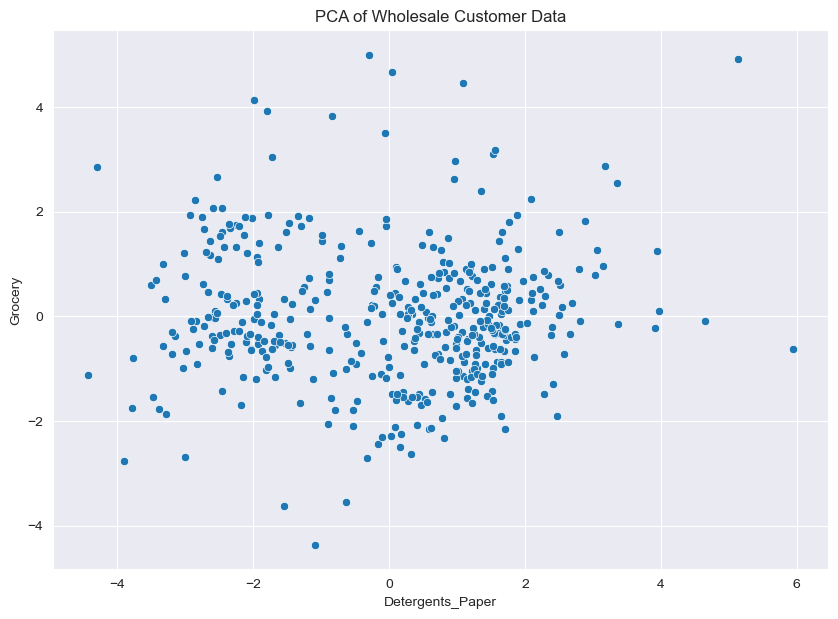

In [31]:
# Visualize the principal components

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Detergents_Paper', y='Grocery', data=pca_df)
plt.title('PCA of Wholesale Customer Data')
plt.xlabel('Detergents_Paper')
plt.ylabel('Grocery')
plt.show()


In [32]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.40664347 0.20531712]


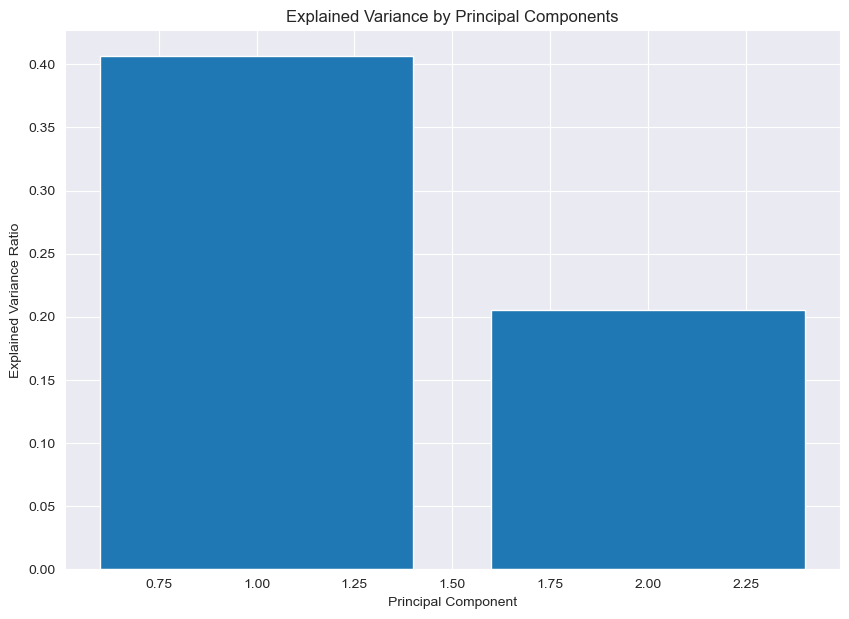

In [33]:
# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Key Conclusions:

1. **K-Means Clustering**:
   - Identified three customer segments:
     - **Cluster 1**: Moderate spenders on Fresh and Grocery items.
     - **Cluster 2**: Highest spenders across most categories, especially Fresh, Grocery, and Detergents_Paper.
     - **Cluster 3**: Moderate to high spenders on Milk, Fresh, Grocery, and Detergents_Paper.
   - Useful for targeted marketing and personalized promotions.

2. **Hierarchical Clustering**:
   - Confirmed three main customer segments similar to K-Means results.
   - Validates the distinct purchasing behaviors of identified segments.
   - Highlights Cluster 2 as a premium customer group for loyalty programs.

3. **Principal Component Analysis (PCA)**:
   - Reduced data complexity while retaining most variance.
   - First two principal components captured significant variance.
   - Simplifies data visualization and pattern identification.

4. **Exploratory Data Analysis (EDA)**:
   - High correlation between Grocery and Detergents_Paper spending.
   - Identified outliers and skewness in spending distributions.

---

## Thank you